In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train = pd.read_csv('train.csv', nrows=1000000, low_memory=False)
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [46]:
train.drop(columns='row_id',inplace=True)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   timestamp                       1000000 non-null  int64  
 1   user_id                         1000000 non-null  int64  
 2   content_id                      1000000 non-null  int64  
 3   content_type_id                 1000000 non-null  int64  
 4   task_container_id               1000000 non-null  int64  
 5   user_answer                     1000000 non-null  int64  
 6   answered_correctly              1000000 non-null  int64  
 7   prior_question_elapsed_time     976277 non-null   float64
 8   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 64.8+ MB


In [48]:
train.describe()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,976277.000000
mean,7.344311e+09,1.017255e+07,5232.691523,0.019907,806.105689,1.374784,0.617504,25302.962693
std,1.058693e+10,6.029234e+06,3882.323419,0.139681,1025.887530,1.194168,0.525364,19710.310227
min,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,5.211669e+08,4.702585e+06,2057.000000,0.000000,109.000000,0.000000,0.000000,16000.000000
50%,2.824811e+09,9.678259e+06,5052.000000,0.000000,391.000000,1.000000,1.000000,21000.000000
75%,1.010186e+10,1.556872e+07,7421.000000,0.000000,1112.000000,3.000000,1.000000,29666.000000
max,7.809200e+10,2.094902e+07,32736.000000,1.000000,7739.000000,3.000000,1.000000,300000.000000


In [49]:
train['user_answer'].value_counts()

 0    278205
 1    267017
 3    257932
 2    176939
-1     19907
Name: user_answer, dtype: int64

<AxesSubplot:xlabel='user_answer', ylabel='count'>

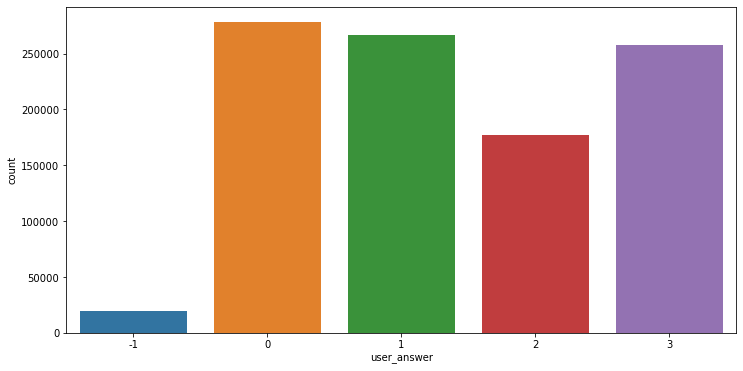

In [50]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='user_answer',data=train)

In [51]:
train['answered_correctly'].value_counts()

 1    637411
 0    342682
-1     19907
Name: answered_correctly, dtype: int64

<AxesSubplot:xlabel='content_type_id', ylabel='count'>

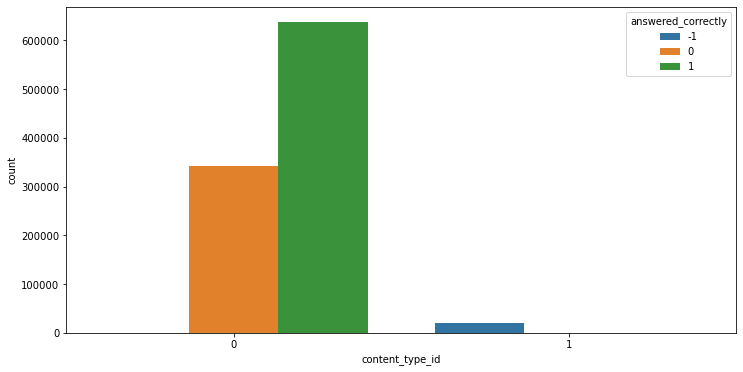

In [52]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='content_type_id',hue='answered_correctly',data=train)

<AxesSubplot:xlabel='user_answer', ylabel='count'>

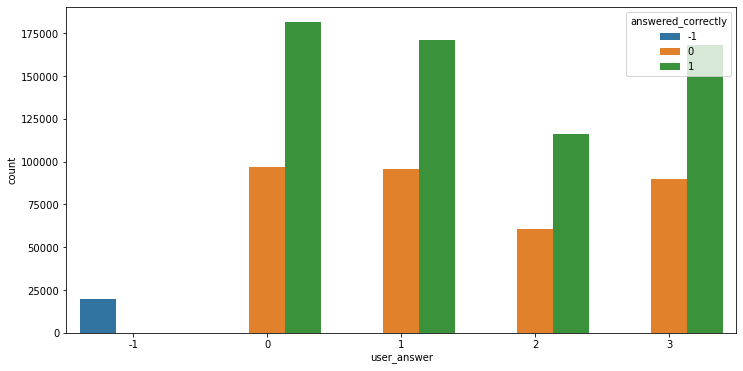

In [53]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='user_answer',hue='answered_correctly',data=train)

<AxesSubplot:xlabel='answered_correctly', ylabel='user_answer'>

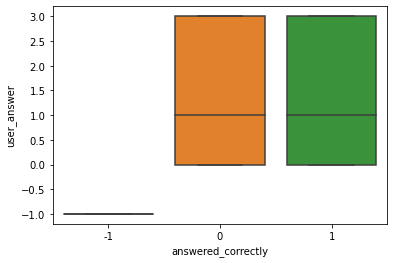

In [54]:
sns.boxplot(y='user_answer',x='answered_correctly',data=train)

<AxesSubplot:>

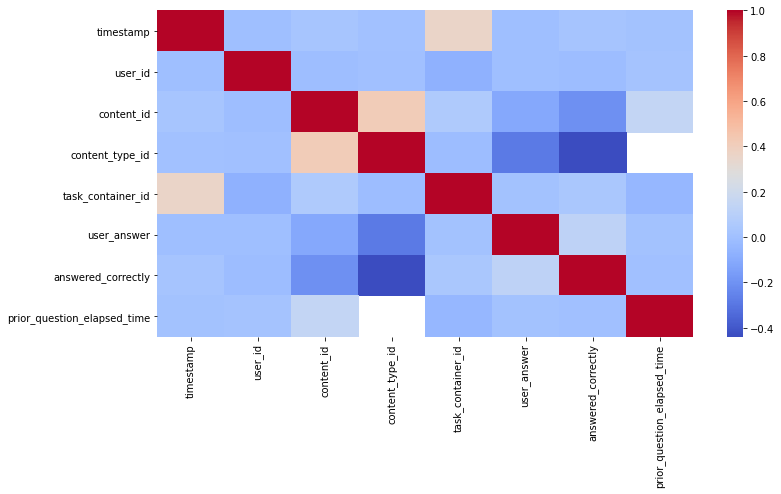

In [55]:
fig = plt.figure(figsize=(12,6))
tc = train.corr()
sns.heatmap(tc,cmap='coolwarm')

Text(0.5, 1.0, 'Questions answered correctly')

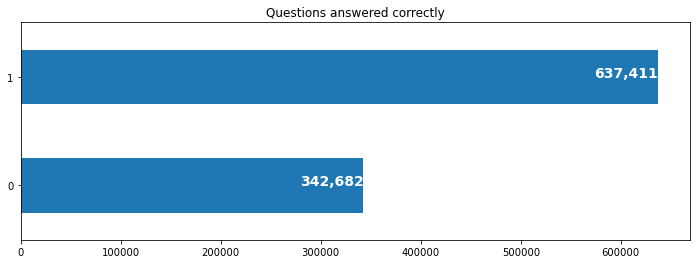

In [56]:
correct = train[train.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right')
plt.title('Questions answered correctly')

In [57]:
train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [58]:
user_answers=train[['user_id','answered_correctly','prior_question_elapsed_time']].groupby('user_id').sum().reset_index()
user_answers.sort_values('answered_correctly',inplace=True,ascending=False)
user_answers.head()

,user_id,answered_correctly,prior_question_elapsed_time
218,1283420,6103,199115872.0
796,4421282,5269,171449743.0
3329,18122922,5069,197441900.0
2104,11610328,5042,220296037.0
682,3838215,4997,170154276.0


In [59]:
users=train[['user_id','answered_correctly']].groupby('user_id').count().reset_index()
user_answers['total']=users['answered_correctly']
user_answers['percent']=np.round((user_answers['answered_correctly']/user_answers['total'])*100)
sort=user_answers.sort_values('percent',ascending=False)
sort.head()

,user_id,answered_correctly,prior_question_elapsed_time,total,percent
308,1880240,1,0.0,1,100.0
3510,19087497,30,537000.0,31,97.0
1339,7528236,30,512912.0,31,97.0
543,3126556,29,400329.0,30,97.0
1392,7788970,29,445329.0,30,97.0


In [60]:
content=train['content_id'].value_counts()
content.head(10)

6116    2041
6173    1978
4120    1924
175     1877
7876    1847
7900    1767
2063    1695
2064    1695
2065    1695
3365    1671
Name: content_id, dtype: int64

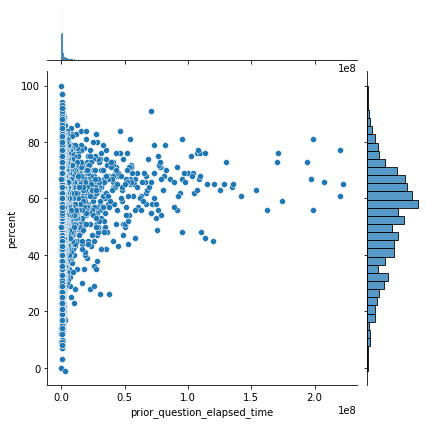

In [61]:
sns.jointplot(y='percent',x='prior_question_elapsed_time',data=user_answers)

In [62]:
user_answers['minutes']=np.round(user_answers['prior_question_elapsed_time']/60000)
user_answers.head(10)

,user_id,answered_correctly,prior_question_elapsed_time,total,percent,minutes
218,1283420,6103,199115872.0,7569,81.0,3319.0
796,4421282,5269,171449743.0,6962,76.0,2857.0
3329,18122922,5069,197441900.0,7593,67.0,3291.0
2104,11610328,5042,220296037.0,6553,77.0,3672.0
682,3838215,4997,170154276.0,6886,73.0,2836.0
240,1440282,4296,106875997.0,5648,76.0,1781.0
1250,7051394,4267,95433495.0,5253,81.0,1591.0
1707,9418512,4200,198461567.0,7482,56.0,3308.0
8,24418,4156,134463967.0,6464,64.0,2241.0
2828,15441391,4008,219996048.0,6541,61.0,3667.0


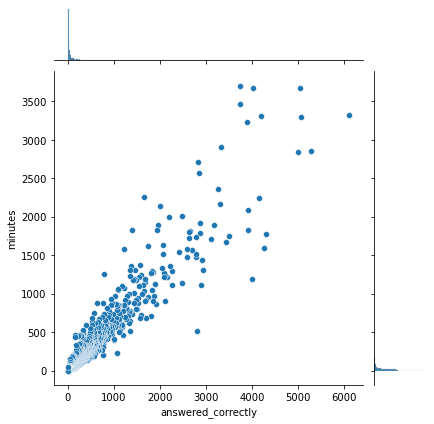

In [63]:
sns.jointplot(x='answered_correctly',y='minutes',data=user_answers)

<AxesSubplot:title={'center':'№ of minutes spent by each users'}, ylabel='Frequency'>

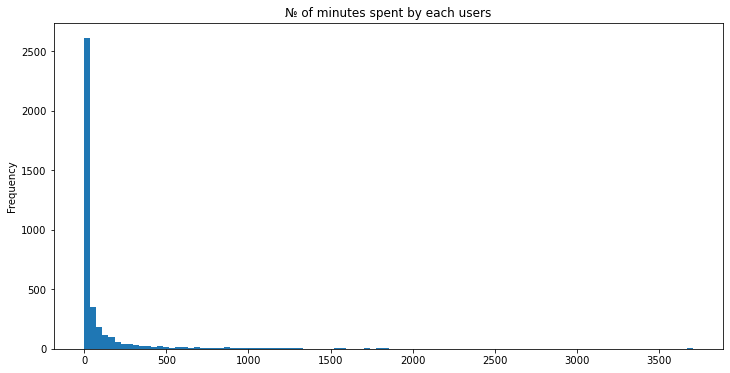

In [64]:
fig = plt.figure(figsize=(12,6))
plt.title('№ of minutes spent by each users')
user_answers['minutes'].plot.hist(bins=100)

Text(0.5, 0, 'time')

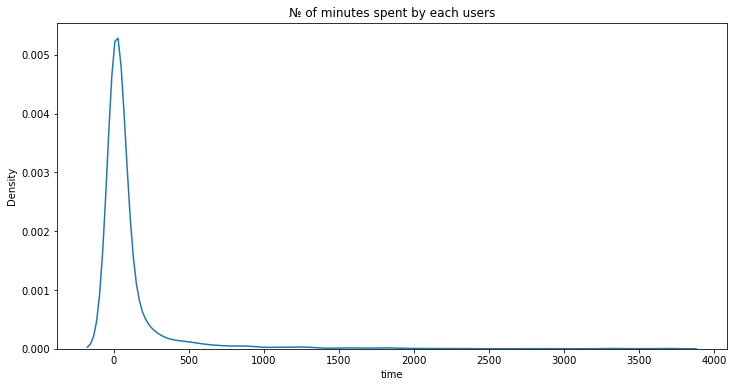

In [65]:
plt.figure(figsize=(12,6))
sns.kdeplot(user_answers['minutes'].values)
plt.title('№ of minutes spent by each users')
plt.xlabel('time')

In [66]:
user_answers['minutes'].describe()

count    3824.000000
mean      107.663441
std       303.654578
min         0.000000
25%         9.000000
50%        17.000000
75%        61.000000
max      3704.000000
Name: minutes, dtype: float64

<AxesSubplot:xlabel='percent', ylabel='minutes'>

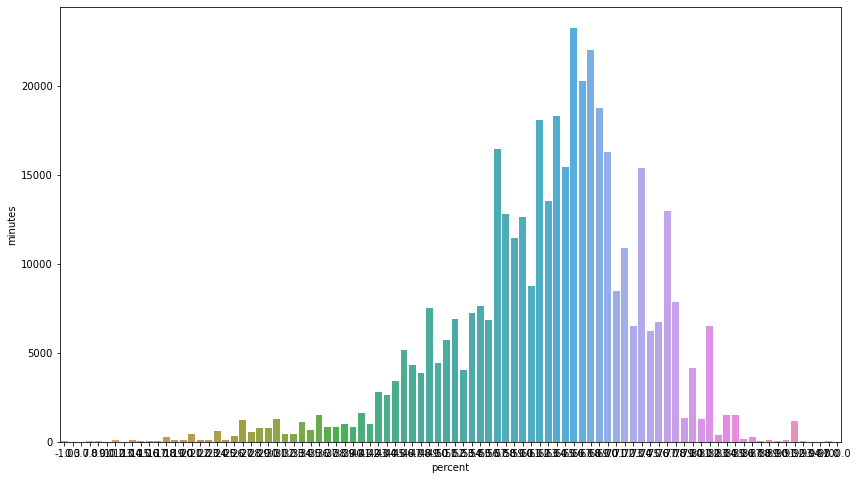

In [67]:
average_percent=user_answers.groupby(['percent']).sum().round().reset_index().sort_values('percent')

plt.figure(figsize=(14,8))
sns.barplot(x='percent',y='minutes',data=average_percent,order=average_percent['percent'])

Text(0.5, 1.0, 'Timestamp')

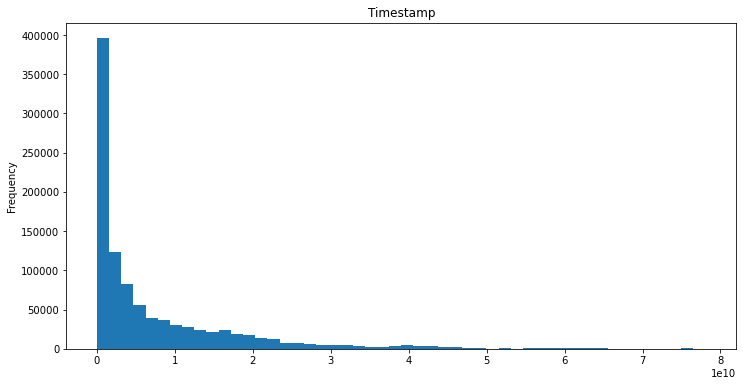

In [68]:
fig = plt.figure(figsize=(12,6))
train['timestamp'].plot.hist(bins=50)
plt.title("Timestamp")


Text(0.5, 1.0, 'Timestamp')

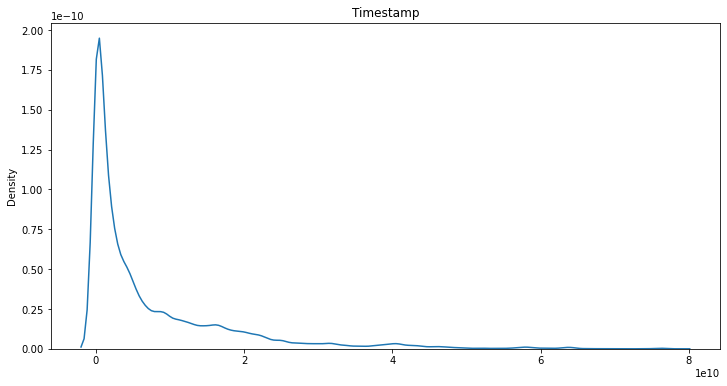

In [69]:
fig = plt.figure(figsize=(12,6))
sns.kdeplot(train['timestamp'].values)
plt.title("Timestamp")

Text(0, 0.5, 'Prior question had explanation')

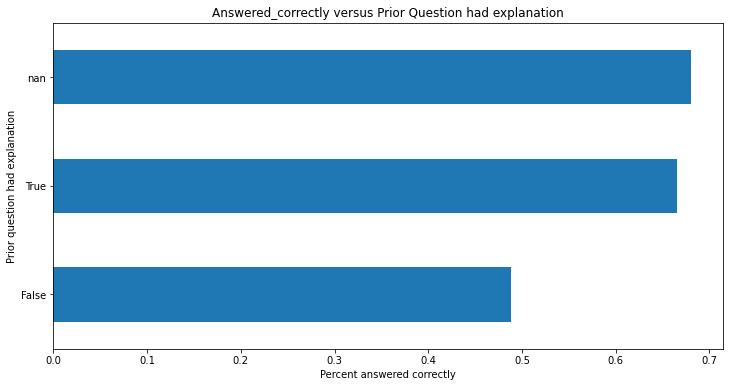

In [70]:
pq = train[train.answered_correctly != -1].groupby(['prior_question_had_explanation'], dropna=False).agg({'answered_correctly': ['mean', 'count']})
pq = pq.iloc[:,0]

fig = plt.figure(figsize=(12,6))
pq.plot.barh()
plt.title("Answered_correctly versus Prior Question had explanation")
plt.xlabel("Percent answered correctly")
plt.ylabel("Prior question had explanation")

In [71]:
train[train.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

0    342682
1    637411
Name: answered_correctly, dtype: int64

In [72]:
train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [73]:
lectures = pd.read_csv('lectures.csv')

In [74]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


In [75]:
lectures.head(10)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
5,335,114,2,concept
6,484,179,5,concept
7,641,134,6,solving question
8,761,93,1,concept
9,814,80,5,solving question


In [76]:
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


Text(0.5, 1.0, 'types of lectures')

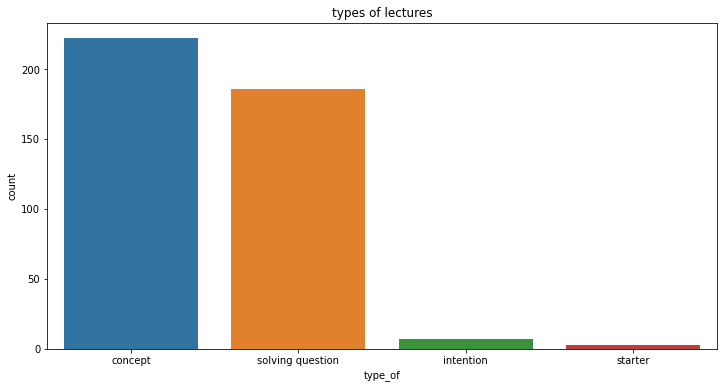

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x='type_of',data=lectures,order=lectures['type_of'].value_counts().index)
plt.title('types of lectures')

In [78]:
questions = pd.read_csv('questions.csv')

In [79]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 475.5+ KB


In [80]:
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [81]:
questions['tags_list'] = questions['tags'].astype(str)
tags_list = [x.split() for x in questions.tags_list.values]
questions['tags_list'] = tags_list

In [82]:
correct_answers = train[train.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
correct_answers = correct_answers.pivot(index= "content_id", columns='answered_correctly', values='size')
correct_answers.columns = ['Wrong', 'Right']
correct_answers = correct_answers.fillna(0)
correct_answers[['Wrong', 'Right']] = correct_answers[['Wrong', 'Right']].astype(int)
questions = questions.merge(correct_answers, left_on = "question_id", right_on = "content_id", how = "left")
questions.head()

,question_id,bundle_id,correct_answer,part,tags,tags_list,Wrong,Right
0,0,0,0,1,51 131 162 38,"[51, 131, 162, 38]",10.0,63.0
1,1,1,1,1,131 36 81,"[131, 36, 81]",4.0,51.0
2,2,2,0,1,131 101 162 92,"[131, 101, 162, 92]",195.0,249.0
3,3,3,0,1,131 149 162 29,"[131, 149, 162, 29]",40.0,159.0
4,4,4,3,1,131 5 162 38,"[131, 5, 162, 38]",122.0,185.0


<AxesSubplot:>

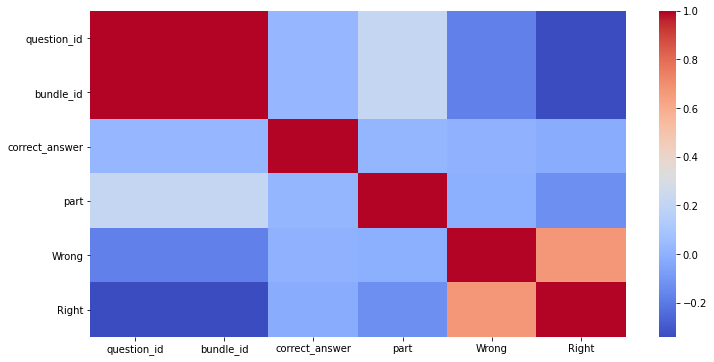

In [83]:
fig = plt.figure(figsize=(12,6))
qc = questions.corr()
sns.heatmap(qc,cmap='coolwarm')

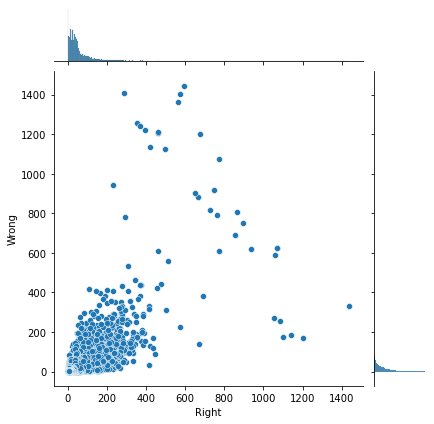

In [84]:
sns.jointplot(y='Wrong',x='Right',data=questions)